<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/CedilloRuben_T09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Librerías***

* Estás son todas las líbrerias usadas en esta práctica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# ***Trabajo de Clase***

##  ***1. Introducción***

* Estudio de:

  + Modelo Neuronal de McCulloch-Pitts
  - Perceptrón de Rosenblatt
  - Redes Neuronales Multicapa de Scikit-Learn

## ***2.  Computación Neuronal***

* Autómata:
  - Modelo abstracto de una máquina o sistema computacional que sigue reglas predefinidas para procesar entradas y generar salidas.

+ Modelo de Turing:

  + Máquina capaz de leer símbolo, consultar una tabla de reglas, sobrescribir un símbolo, cambiar estado interno y generar una salida

+ La mayoría de los programas de programación actuales se basan en el paradigma del modelo de Turing

## ***3. La Máquina de Turing*** **texto en negrita**

* McCulloch y Pitts propusieron un modelo de computación basado en redes neuronales artificiales
+ Este determinaba la validez de un teorema lógico mediante la activación de neuronas



## ***4. Neuronas de McCulloch-Pitts***

+ Estructura Neuronal

  + Dendritas: canales de entrada

  + Axón: canal de salida

  + Sinapsis: conexión axón-dendrita que comunica neuronas

+ Tipo de Conexiones Sinápticas

  + Contribuciones a la suma de las señales

  + Activadora: $+1$
  + Inhibidora: $-1$

+ Función de escalón de Heaviside:


$$
f(x)= \left\{
  1, \quad \text{si  } x>U
  \atop
  0, \quad \text{si } x \leq U
  \right.
  \qquad
  \text{con }
  x = \sum_i c_id_i
$$

+ donde

  + $c_i \in \{1, -1\}$, $1$ si es excitadora, $-1$ si es inhibidora
  + $d_i \in \{0, 1\}$, $0$ inactiva, $1$ activada

+ La segunda operación es de la forma

$$
s = H(x-U)= \left\{
  1, \quad \text{si  } x \geq U
  \atop
  0, \quad \text{si } x < U
  \right.
$$

+ con
  + $s \in \{0, 1\}$, $U$ umbral, $H$ función de Heaviside

+ Esta es la descipción más básica del comportamiento de una neurona

### ***4.1 Ejemplo de Álgebra Booleana Usando ANNs***

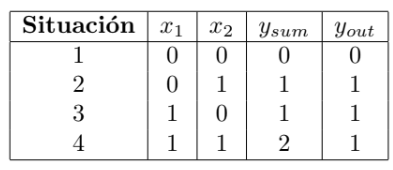

* Las ecuaciones del modelo se representan como:

$$
y_{sum} = \sum_{i=1}^{2}w_ix_i
$$

+ y

$$
y_{out} = f(y_{sum}) =\left\{
  1, \quad \text{si  } x \geq 1
  \atop
  0, \quad \text{si } x < 1
  \right.
$$

### ***4.2 Implementa tu Modelo Neuronal de McCulloch-Pitts***

In [ ]:
def neurona_mcculloch_pitts(entradas, pesos, umbral):
# Calcular la suma ponderada de las entradas
  suma_ponderada = np.dot(entradas, pesos)
# Aplicar la funci ́on de activaci ́on (escal ́on de Heaviside)
  salida = 1.0 if suma_ponderada >= umbral else 0.0
  return salida


# Valores de entrada
entradas = np.array([0.5, 0.3, 0.8])
pesos = np.array([0.2, 0.4, 0.6])
umbral = 0.7
# Calcular la salida de la neurona
salida = neurona_mcculloch_pitts(entradas, pesos, umbral)
print("Salida:", salida)

Salida: 1.0


* Coincide completamente con lo esperado

### ***4.3 Aplicación: Puerta Lógica AND***

In [ ]:
columnas = ['x1', 'x2', 'AND']
puerta_and = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
tabla = pd.DataFrame(puerta_and, columns=columnas)
tabla

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


* Esta nueva apliación Heavisade podemos demostrar la existencias de una recta de separación

In [ ]:
#compuerta ogica #y#

casos = [
([0, 0], 0),
([0, 1], 0),
([1, 0], 0),
([1, 1], 1),
]
pesos = np.array([1, 1])
umbral = 2
for entrada, salida_esperada in casos:
  salida = neurona_mcculloch_pitts(np.array(entrada), pesos, umbral)
  print(f"Entrada: {entrada}, Salida: {salida}, Salida esperada: {salida_esperada}")

Entrada: [0, 0], Salida: 0.0, Salida esperada: 0
Entrada: [0, 1], Salida: 0.0, Salida esperada: 0
Entrada: [1, 0], Salida: 0.0, Salida esperada: 0
Entrada: [1, 1], Salida: 1.0, Salida esperada: 1


* Que las soluciones sean iguales a la tabla índica que la neurona puede diferenciar o resolver problemas lógico

In [ ]:
columnas = ['x1', 'x2', 'OR']
puerta_or = [[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
tabla = pd.DataFrame(puerta_or, columns=columnas)
tabla.head()

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
#compuerta "OR"
casos = [
([0, 0], 0),
([0, 1], 1),
([1, 0], 1),
([1, 1], 1),
]
pesos = np.array([1, 1])
umbral = 1
for entrada, salida_esperada in casos:
  salida = neurona_mcculloch_pitts(np.array(entrada), pesos, umbral)
  print(f"Entrada: {entrada}, Salida: {salida}, Salida esperada: {salida_esperada}")

Entrada: [0, 0], Salida: 0.0, Salida esperada: 0
Entrada: [0, 1], Salida: 1.0, Salida esperada: 1
Entrada: [1, 0], Salida: 1.0, Salida esperada: 1
Entrada: [1, 1], Salida: 1.0, Salida esperada: 1


## ***5. Modelo de Percepetrón de Rosenblatt***

* El Perceptrón de Rosenblatt está basado en el modelo de McCulloch-Pitts. Su función es clasificar un conjunto de entradas en dos clases, $c_1$ y $c_2$, mediante un modelo simple:

  + Recibe entradas $x_1, ..., x_n$
  + Entrads de peso sináptico $w_1, ..., w_n$
  + Combinador lineal:
  $$
v = \sum_{i=1}^{n} w_i x_i
  $$

  + Sesgo $w_0$ con entrada ficticia $x_0 = 1$
  $$
v = \sum_{i=0}^{n} w_i x_i
  $$

- El **limitador** define la salida:
  - $ y_{\text{out}} = +1 $ si $ v > 0 $
  - $ y_{\text{out}} = -1 $ si $ v < 0 $

+ Objetivo:  
  + Separar las entradas en dos clases usando un **hiperplano** definido por:
$$
\sum_{i=0}^{n} w_i x_i = 0
$$

### ***5.1. Aplicación del Perceptrón: Puerta Lógica AND***

In [ ]:
X = tabla.values[:, 0:2]
y = tabla.values[:, 2]
nn = Perceptron(eta0=0.01, max_iter=10, random_state=1)
nn.fit(X, y)
print(nn.coef_) # pesos
print(nn.intercept_) # sesgo

[[0.02 0.02]]
[-0.01]


In [ ]:
y_pred = nn.predict(X)
print("Precisi ́on:", accuracy_score(y, y_pred))
print("Salidas predichas:", y_pred)

Precisi ́on: 1.0
Salidas predichas: [0 1 1 1]


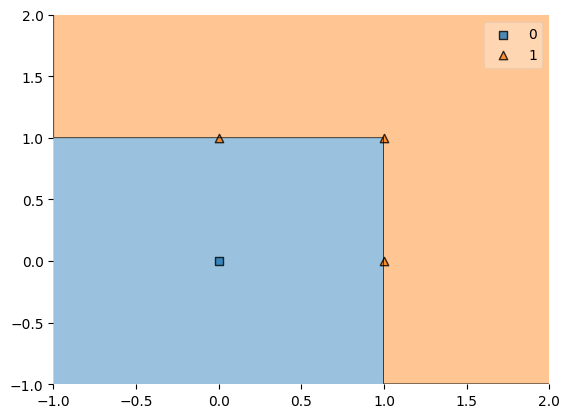

In [ ]:
plot_decision_regions(X, y, clf=nn)
plt.show()

In [ ]:
print("w1 =", nn.coef_[0][0])
print("w2 =", nn.coef_[0][1])
print("b =", nn.intercept_[0])
print("Recta: x1 + x2 =", round(-nn.intercept_[0]/nn.coef_[0][0], 2))

w1 = 0.02
w2 = 0.02
b = -0.01
Recta: x1 + x2 = 0.5


### ***5.1.2. Puerta Lógica OR***

In [ ]:
columnas = ['x1', 'x2', 'OR']
puerta_or = [[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
tabla = pd.DataFrame(puerta_or, columns=columnas)
tabla.head()

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
X = tabla.values[:, 0:2]
y = tabla.values[:, 2]
nn = Perceptron(eta0=0.01, max_iter=10, random_state=1)
nn.fit(X, y)
print(nn.coef_) # pesos
print(nn.intercept_) # sesgo

[[0.02 0.02]]
[-0.01]


In [ ]:
y_pred = nn.predict(X)
print("Precisi ́on:", accuracy_score(y, y_pred))
print("Salidas predichas:", y_pred)

Precisi ́on: 1.0
Salidas predichas: [0 1 1 1]


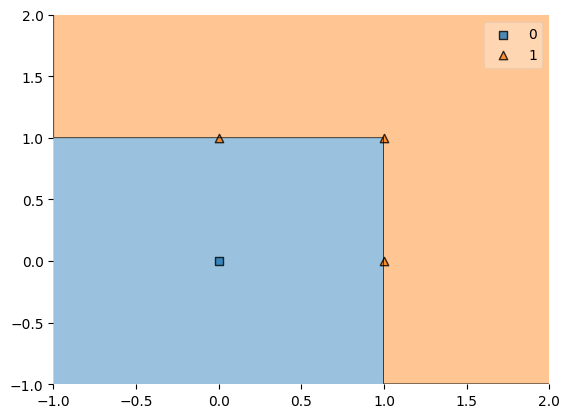

In [ ]:
plot_decision_regions(X, y, clf=nn)
plt.show()

### ***5.2. Limitaciones del Perceptrón***

In [ ]:
#compuerta ogica XOR

casos = [
([0, 0], 0),
([0, 1], 1),
([1, 0], 1),
([1, 1], 0),
]
pesos = np.array([1, 1])
umbral = 1
#sin importar el umbral que se escoja, el modelo del perceptron jamás podra predecir correctamente la compuerta XOR
for entrada, salida_esperada in casos:
  salida = neurona_mcculloch_pitts(np.array(entrada), pesos, umbral)
  print(f"Entrada: {entrada}, Salida: {salida}, Salida esperada: {salida_esperada}")

Entrada: [0, 0], Salida: 0.0, Salida esperada: 0
Entrada: [0, 1], Salida: 1.0, Salida esperada: 1
Entrada: [1, 0], Salida: 1.0, Salida esperada: 1
Entrada: [1, 1], Salida: 1.0, Salida esperada: 0


In [ ]:
cols = ['x1', 'x2', 'XOR']
puerta_xor=[[0,0,0], [1,0,1], [0,1,1], [1,1,0]]
df = pd.DataFrame(puerta_xor, columns=cols)
df

,x1,x2,XOR
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


In [ ]:
X = df.values[:, 0:2]
y = df.values[:, 2]
nn_xor = Perceptron(eta0=0.01, max_iter=10, random_state=1)
nn_xor.fit(X, y)
print(nn_xor.coef_) # pesos
print(nn_xor.intercept_) # sesgo

[[-0.01  0.  ]]
[0.]


In [ ]:
y_pred = nn_xor.predict(X)
print("Precisi ́on:", accuracy_score(y, y_pred))
print("Salidas predichas:", y_pred)

Precisi ́on: 0.5
Salidas predichas: [0 0 0 0]


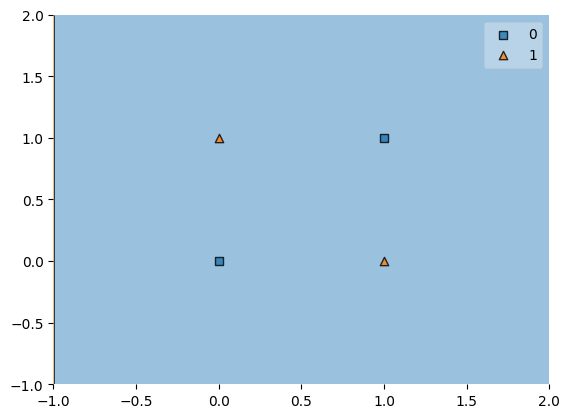

In [ ]:
plot_decision_regions(X, y, clf=nn_xor)
plt.show()

* Este modelo de IA teine una limitación insuperable, es necesario mirar este problema desde otra prespectiva o con otras herramientas

### ***5.3 Implementación en Scikit-Learn de un Multi-Layer Perceptrón***

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic',
solver='lbfgs', random_state=1, max_iter=1000)

* Entrenamos el modelo para mirar los resultados

1.0


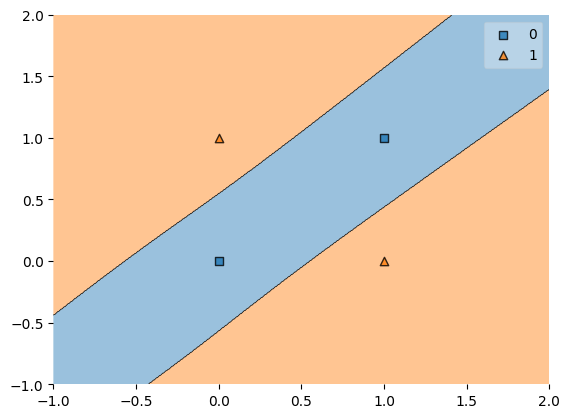

In [ ]:
mlp.fit(X, y)
y_pred = mlp.predict(X)
print(accuracy_score(y, y_pred))
plot_decision_regions(X.astype(np.float32), y.astype(np.int32), clf=mlp)
plt.show()

* Notese que ahora sí es posible predecir/resolver el problema

## ***6. Playground de TensorFlow***

### ***6.1. Parámetros de MLP Classifier***

* _hidden _layer _sizes_: (n,m)
  + Cantidad de capas (dimensión de la tupla) y número de neurona por capa (vlaores de n, m)

+ _activation_
  + _logistic_, _tanh_, _relu_

+ _solver_
  + _adam_, _lbfgs_, _sgd_

+ _learning _ rate_
 + _constant_, _invscaling_, _adaptive_

+ _max _ iter_
  + Cantidad de iteraciones duarante el entrenamiento

# ***Tarea***

## ***6.2. Tarea***

### ***6.2.1 Parte Teórica***

1. **Máquina de Turing**

  + 1.1 ¿Qué elementos la componen?
    + Cinta Infinita: Memoria de trabajo
    + Cabeza Lectora/Escritora: Interctúa con la cinta
    + Conjunto de Estados: Describe en qué parte del "programa" está.
    + Tabla de transición: Reglas que dicen cómo actuar según el símbolo y el estado actual.

  + 1.2 ¿Cuál es su funcionamiento?
    + La cinta infinita dividida en casillas, cada una de ellas conteniendo un símbolo. La cabeza lectora lee el símbolo en la cinta y reescribe uno nuevo o mantiene el mismo despues se mueve hacia la izquierda o a la derecha.

    + La maquina sigue un conjunto de reglas que le dice que acción realizar según el símbolo detectado y a qué estado cambiar.

2. **¿Qué significa que un lenguaje de programación actual (como Python o
C++) siga el paradigmma de Turing?**

  + Es "Turing-Completo", es decir, tiene posibilidad de resolver cualquier problema computable que una Máquina de Turing teórica tambien pueda resolver, siempre y cuando tenga la memoria y tiempo suficientes

  + Realizan manipulación simbólica secuencial, cuentan con estructuras de control o bucles que son equivalentes al movimiento de cabeza de lectura de la maquina de Turing, además de que sus variables y estructuras simulan la cinta infinita.

3. **Reflexiona: ¿Qué ventajas y limitaciones tiene el enfoque simbólico (como las máquinas de Turing) frente al enfoque conexionista (como las redes neuronales)?**

  + Ventajas del Enfoque Simbólico

    Precisión y mayor control con reglas explícitas ideal para tareas lógicas, con un proceso interpretable capaz de emular cualquier sistema computable

  + Desventajas del Enfoque Simbólico

    Para problemas muy complejos necesitaria de una cantidad enorme de reglas explicitas, todas programadas de manera manual con una estructura poco robusta ante ambigüedades o ruido.

  + Ventajas del Enfoque Conexionista

    Un procesos automatizado a los datos, con modelos robustos capaz de resolver problemas complejos sin la necesidad de una estructura tan compleja, todo realizado en un procesamiento distribuido

  + Desventajas del Enfoque Conexionista

    Falta de interpretabilidad, los modelos conexos complejos tienden a hacerse una caja negra. Dependen de la cantidad datos (tiene que ser alta) y de altos recursos computacionales


4. **Discute: ¿Cómo influye el tamaño de las capas ocultas en la predictividad de una red neuronal?**

  + El tamaño de las capas ocultas es un hiperparámetro crítico que afecta directamente la capacidad predictiva de una red neuronal. Ahora dada una red neuronal podemos o bien disminuir o aumentar la cantidad de neuronas.

  + Aumento del Tamaño:

    + Tiene ventajas como el poder modeloar patrones más complejos, pues teóricamente una capa o red lo suficientemente grande podria aproximar cualquier función continua, cualquier comportamiento y/o clasificar.
    + Pero en la práctica vemos que una red más compleja de lo que un problema podria requerir induce un sobreajuste (memoriza en vez de aprender) y gasta más recursos computacionales de los necesarios para el problema.

  + Disminución del Tamaño:

    + Ahora por otra parte si disminuimos el tamaño de las capas entonces el problema del sobreajuste se hace menos probable de presentarse, ahorramos recursos computacionales y eficientamos en todos los aspectos el procesado del problema
    + Sin embargo si las capas son muy pequeñas entonces la red podria no tener la capacidad de capturar los patrones importantes, es decir no es posible resolver con una red pequeña o capas pequeñas problemas complejos.

  + En conclusión el tamaño de las capas debe de ser un equilibrio que cuide la capacidad del modelo y el uso de recursos computacionales


5. **¿Fue el poder de cómputo lo que impulsó la revolución del Deep Learning?**

  + Más bien el poder de cómputo permitio la implementación del Deep Learning, es decir, la revolución del Deep Learning requirió la convergencia de varias áreas de conocimento.

  + El desarrollo de los GPU's y TPU's fue escencial para tener capacidad de uso de los algoritmos del DL

  + El Big Data, la llegada de nuevos algoritmos como las funciones de ativación trascendentales, el dropout y backpropagation da pauta a entrenar redes neuronales capaces de resolver problemas complejos.

### ***6.2.2 Clasificación con Redes Neuronales***

#### ***1. Conjunto de Datos del Cáncer de Mama***

* Cargamos los datos

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]

df = pd.DataFrame(X, columns=dataset["feature_names"])
df["target"] = y

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


* Creamos los conjuntos de entrenamiento (80%) y prueba (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### ***2. Red Neuronal MLP (MLPClassifier)***

* Nuestra red neuronal incluira:
  + 2 capas ocultas con 10 neuronas
  + Función de activación "_tanh_"
  + 1000 iteraciones
  + Resto de parámetros default

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='tanh',
solver='lbfgs', random_state=1, max_iter=1000)

#### ***3. Precisión del Modelo***

* Calculamos a continuación la precisión del modelo en el conjunto de prueba

In [ ]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6228070175438597


#### ***4. Estandarización de las Caracteríticas***

* Usamos el código sugerido por el texto para el anaálisis

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Ahora: ¿Cuál es la diferencia de rendimiento antes y después de estandarizar?

In [ ]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mlp_a_base = accuracy_score(y_test, y_pred)
print("La precisión del modelo es:", mlp_a_base)

La precisión del modelo es: 0.9473684210526315


* Notamos una subida sustancial de la precisión del modelo con un aumento del ¡52.12%! respecto al primer testeo

#### ***5. Experimentación con el Modelo***

##### a) Ensanchamiento

In [ ]:
#Aummentamos en 50 neuronas por capa en lugar de las 10
mlp_50 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_50.fit(X_train, y_train)
y_pred = mlp_50.predict(X_test)
mlp_a_50 = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 2 capas de 50 neuronas es:" ,mlp_a_50)

La precisión del modelo de 2 capas de 50 neuronas es: 0.9736842105263158


* Mejora en un 2.78% en precisión el modelo

##### b) Aumento de profundidad

In [ ]:
#4 capas de 10 neuronas
mlp_4_10 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), activation='tanh',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_4_10.fit(X_train, y_train)
y_pred = mlp_4_10.predict(X_test)
mlp_a_4_10 = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 4 capas de 10 neuronas es:", mlp_a_4_10)

#4 capas de 50 neuronas
mlp_4_50 = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50), activation='tanh',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_4_50.fit(X_train, y_train)
y_pred = mlp_4_50.predict(X_test)
mlp_a_4_50 = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 4 capas de 50 neuronas es:", mlp_a_4_50)

La precisión del modelo de 4 capas de 10 neuronas es: 0.9385964912280702
La precisión del modelo de 4 capas de 50 neuronas es: 0.9649122807017544


##### c) Función de Activación

In [ ]:
#2 capas de 10 neuronas con función de activación logistic
mlp_2_10_logistic = MLPClassifier(hidden_layer_sizes=(10, 10), activation='logistic',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_2_10_logistic.fit(X_train, y_train)
y_pred = mlp_2_10_logistic.predict(X_test)
mlp_a_2_10_logistic = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 2 capas de 10 neuronas con función de activación logistic es:", mlp_a_2_10_logistic)

#2 capas de 10 neuronas con función de activación relu
mlp_2_10_relu = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_2_10_relu.fit(X_train, y_train)
y_pred = mlp_2_10_relu.predict(X_test)
mlp_a_2_10_relu = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 2 capas de 10 neuronas con función de activación relu es:", mlp_a_2_10_relu)

#2 capas de 50 neuronas con función de activación logistic
mlp_2_50_logistic = MLPClassifier(hidden_layer_sizes=(50, 50), activation='logistic',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_2_50_logistic.fit(X_train, y_train)
y_pred = mlp_2_50_logistic.predict(X_test)
mlp_a_2_50_logistic = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 2 capas de 50 neuronas con función de activación logistic es:", mlp_a_2_50_logistic)

#2 capas de 50 neuronas con función de activación relu
mlp_2_50_relu = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_2_50_relu.fit(X_train, y_train)
y_pred = mlp_2_50_relu.predict(X_test)
mlp_a_2_50_relu = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 2 capas de 50 neuronas con función de activación relu es:", mlp_a_2_50_relu)

La precisión del modelo de 2 capas de 10 neuronas con función de activación logistic es: 0.956140350877193
La precisión del modelo de 2 capas de 10 neuronas con función de activación relu es: 0.9385964912280702
La precisión del modelo de 2 capas de 50 neuronas con función de activación logistic es: 0.9649122807017544
La precisión del modelo de 2 capas de 50 neuronas con función de activación relu es: 0.9736842105263158


In [ ]:
#4 capas de 10 neuronas con función de activación logistic
mlp_4_10_logistic = MLPClassifier(hidden_layer_sizes=(10, 10,10,10), activation='logistic',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_4_10_logistic.fit(X_train, y_train)
y_pred = mlp_4_10_logistic.predict(X_test)
mlp_a_4_10_logistic = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 4 capas de 10 neuronas con función de activación logistic es:", mlp_a_4_10_logistic)

#4 capas de 10 neuronas con función de activación relu
mlp_4_10_relu = MLPClassifier(hidden_layer_sizes=(10, 10,10,10), activation='relu',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_4_10_relu.fit(X_train, y_train)
y_pred = mlp_4_10_relu.predict(X_test)
mlp_a_4_10_relu = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 4 capas de 10 neuronas con función de activación relu es:", mlp_a_4_10_relu)

#4 capas de 50 neuronas con función de activación logistic
mlp_4_50_logistic = MLPClassifier(hidden_layer_sizes=(50, 50,50,50), activation='logistic',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_4_50_logistic.fit(X_train, y_train)
y_pred = mlp_4_50_logistic.predict(X_test)
mlp_a_4_50_logistic = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 4 capas de 50 neuronas con función de activación logistic es:", mlp_a_4_50_logistic)

#4 capas de 50 neuronas con función de activación relu
mlp_4_50_relu = MLPClassifier(hidden_layer_sizes=(50, 50,50,50), activation='relu',
solver='lbfgs', random_state=1, max_iter=1000)

mlp_4_50_relu.fit(X_train, y_train)
y_pred = mlp_4_50_relu.predict(X_test)
mlp_a_4_50_relu = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 4 capas de 50 neuronas con función de activación relu es:", mlp_a_4_50_relu)

La precisión del modelo de 4 capas de 10 neuronas con función de activación logistic es: 0.9824561403508771
La precisión del modelo de 4 capas de 10 neuronas con función de activación relu es: 0.956140350877193
La precisión del modelo de 4 capas de 50 neuronas con función de activación logistic es: 0.9736842105263158
La precisión del modelo de 4 capas de 50 neuronas con función de activación relu es: 0.956140350877193


In [ ]:
#3 capas de 10 neuronas con función de activación relu y solver adam
mlp_best = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu',
solver='adam', random_state=1, max_iter=1000)

mlp_best.fit(X_train, y_train)
y_pred = mlp_best.predict(X_test)
mlp_a_best = accuracy_score(y_test, y_pred)
print("La precisión del modelo de 2 capas de 10 neuronas con función de activación relu y solver adam es:", mlp_a_best)

La precisión del modelo de 2 capas de 10 neuronas con función de activación relu y solver adam es: 0.9824561403508771


##### d) Mejor Rendimiento

In [ ]:
import pandas as pd

# Crear DataFrame con los resultados
results = {
    'Configuración': [
        '2 capas (50,50) - relu',
        '2 capas (10,10) - relu + adam',
        '4 capas (50,50,50,50) - relu',
        '2 capas (50,50) - tanh',
        '4 capas (10,10,10,10) - relu',
        '2 capas (10,10) - relu',
        '2 capas (50,50) - logistic',
        '4 capas (50,50,50,50) - logistic',
        '4 capas (10,10,10,10) - tanh',
        '2 capas (10,10) - tanh',
        '4 capas (10,10,10,10) - logistic',
        '2 capas (10,10) - logistic'
    ],
    'Precisión': [
         mlp_a_2_50_relu,
         mlp_a_best,
         mlp_a_4_50_relu,
         mlp_a_50,
         mlp_a_4_10_relu,
       mlp_a_2_10_relu,
       mlp_a_2_50_logistic,
         mlp_a_4_50_logistic,
       mlp_a_4_10,
         mlp_a_base,
         mlp_a_4_10_logistic,
       mlp_a_2_10_logistic,
    ],
    'Capas': [2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2],
    'Neuronas por capa': [50, 10, 50, 50, 10, 10, 50, 50, 10, 10, 10, 10],
    'Activación': ['relu', 'relu', 'relu', 'tanh', 'relu', 'relu', 'logistic', 'logistic', 'tanh', 'tanh', 'logistic', 'logistic'],
    'Solver': ['lbfgs', 'adam', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs']
}

df_results = pd.DataFrame(results).sort_values('Precisión', ascending=False).reset_index(drop=True)
df_results

,Configuración,Precisión,Capas,Neuronas por capa,Activación,Solver
0,"2 capas (10,10) - relu + adam",0.982456,2,10,relu,adam
1,"4 capas (10,10,10,10) - logistic",0.982456,4,10,logistic,lbfgs
2,"2 capas (50,50) - tanh",0.973684,2,50,tanh,lbfgs
3,"2 capas (50,50) - relu",0.973684,2,50,relu,lbfgs
4,"4 capas (50,50,50,50) - logistic",0.973684,4,50,logistic,lbfgs
5,"2 capas (50,50) - logistic",0.964912,2,50,logistic,lbfgs
6,"4 capas (50,50,50,50) - relu",0.956140,4,50,relu,lbfgs
7,"4 capas (10,10,10,10) - relu",0.956140,4,10,relu,lbfgs
8,"2 capas (10,10) - logistic",0.956140,2,10,logistic,lbfgs
9,"2 capas (10,10) - tanh",0.947368,2,10,tanh,lbfgs


* De esta ultima tabla podemos decir que la cocnfiguraión que tiene el mejor rendimiento es


```
MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', random_state=1, max_iter=1000)
```

* pues es la arquitectura más simple y que registra el mejor accuracy

##### e) Random Forest vs MLPClassifier

* Para iniciar la comparación en rendimientos primero haremos nuestro _Bosque Aleatorio_

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)

print("La precisión del Random Forest es:", rf_accuracy)

La precisión del Random Forest es: 0.9649122807017544


* Llamamos una vez más al accuracy de nuestra mejor configuración de _MLPClassifier_

In [ ]:
mlp_a_best

0.9824561403508771

* Construimos las matrices de confusión

In [ ]:
# Matrices de confusión
y_pred_mlp = mlp_best.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("\nMatriz de Confusión (MLP):")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nMatriz de Confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


Matriz de Confusión (MLP):
[[42  1]
 [ 1 70]]

Matriz de Confusión (Random Forest):
[[40  3]
 [ 1 70]]


* El MLPClassifier en su mejor configuracipn cometió unicamente 1 error (falsos positivos), mientras que el Random Forest cometió 3.

* Las metricas de presición se ven de la siguiente forma
  + Precisión del _Random Forest_ < Precisión del _MLPClassifier_
  + rf_accuracy < mlp_a_best
  + 0.9649 < 0.9824

* Entonces la red neuronal del MLP en su mejor configuración supera ligeramente al bosque aleatorio.